# selenium을 이용한 동적크롤링

### 웹페이지 크롤링 프로세스

1. 크롤링하려는 웹사이트 접속
2. 분석하려는 페이지를 찾고, 페이지 분석을 통해 어떤 태그와 속성이 사용되었는지 파악
3. 파이썬을 이용해 필요 데이터 추출
4. 추출한 데이터를 기반으로 분석 진행

In [1]:
# import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

## #1.selenium 소개

- https://www.selenium.dev/
- 주로 웹앱을 테스트하는데 이용하는 프레임워크
    - 웹 애플리케이션이 특정 브라우저에 잘 작동하는지 확인하기 위해 사용
    
    
- 웹브라우저 이용하는 자동화 프로그램
- 웹브라우저를 이용하여 할 수 있는 행동들을 코드로 작성하여 selenium이 이 코드를 웹브라우저에 전달하여 실행

- **webdriver**라는 API를 통해 운영체제에 설치된 Chrome등의 **브라우저를 제어**함
    - 브라우저를 직접 동작시킨다는 것은 JavaScript를 이용해 비동기적으로 혹은 뒤늦게 불러와지는 컨텐츠들을 가져올 수 있다는 것. 즉, '눈에 보이는' 컨텐츠라면 모두 가져올 수 있다는 뜻
    - requests모듈에서 요청은 브라우저에서 '소스보기'를 한 것과 같이 동작하여, JS등을 통해 동적으로 DOM이 변화한 이후의 HTML을 보여주지 않으나
    - Selenium은 실제 웹 브라우저가 동작하기 때문에 JS로 렌더링이 완료된 후의 DOM결과물에 접근이 가능함

- 웹 브라우저를 제어하는 함수(webdriver)를 포함한 패키지
- 서드파티 라이브러리

### selenium 설치

In [2]:
!pip install selenium 

In [6]:
import selenium
selenium.__version__

'3.141.0'

In [5]:
!pip install selenium --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: selenium
    Found existing installation: selenium 3.141.0
    Uninstalling selenium-3.141.0:
      Successfully uninstalled selenium-3.141.0


-----

### WebDriver Manager 설치

브라우저에 맞는 WebDriver를 자동으로 다운로드 받고 설치하기 위한 WebDriver Manager

In [7]:
!pip install webdriver-manager

### WebDriver Manager와 webdriver모듈 임포트

- [WebDriver Manager for Python](https://github.com/SergeyPirogov/webdriver_manager)

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

- 크롬브라우저에 맞는 webdriver 설치

In [9]:
service = ChromeService(executable_path=ChromeDriverManager().install())

---

### selenium 관련 함수

- Webdriver 객체 생성
    * driver = webdriver.Chrome(드라이버경로)


- url에 접근하는 메서드
    * get(url)
    
    
- 웹페이지 단일 element에 접근하는 메서드
    * find_element(By.TAG_NAME, 'tag_name')
    * find_element(By.ID, 'id_name')
    * find_element(By.CLASS_NAME, 'class_name')
    * find_element(By.CSS_SELECTOR, 'selector')
    * find_element(By.XPATH('xpath경로') : 스크립트 실행 경로를 찾아 접근

    
- 페이지의 여러 element에 접근하는 메서드
    * find_elements(By.TAG_NAME, 'tag_name')
    * find_elements(By.ID, 'id_name')
    * find_elements(By.CLASS_NAME, 'class_name')
    * find_elements(By.CSS_SELECTOR, 'selector')
    * find_elements(By.XPATH('xpath경로')    

- By 모듈의 tag, css, xpath 찾는 기준    

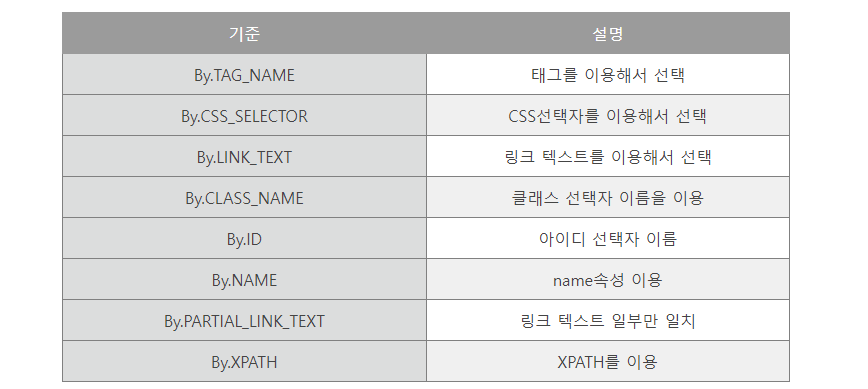

- 자바스크립트 문장 실행
    * execute_script('자바스크립트')

- 접근한 페이지 source 추출
    * html=diver.page_source


- 찾은 element에 적용하는 행동 함수들
    * 마우스 click() 
    * 키보드 send_keys() 


- 드라이버 종료
    * close()

## #2. Selenium 사용하기

### 1. 브라우저에 맞는 웹드라이버 객체 생성

In [10]:
#webdriver 객체 생성
driver = webdriver.Chrome(service=service)

webdriver가 실행되면 빈페이지가 생성 => 이 빈페이지에서 동적으로 웹페이지를 불러올것임

In [11]:
#web페이지가 로드될 때까지 3초 기다림을 지정
driver.implicitly_wait(3)

### 2. 네이버 로그인 페이지 접속

In [12]:
#네이버 로그인 페이지 접근
url = 'https://nid.naver.com/nidlogin.login'
driver.get(url)

In [13]:
#화면 캡쳐
driver.save_screenshot('crawl_data/sshot1.png')

True

### 3. 동적 로그인 진행

#### 로그인 아이디 정보 전달

In [15]:
id_elem = driver.find_element('id', 'id')
id_elem.clear()
id_elem.send_keys('crystal9807')

#### 로그인 비밀번호 전달

In [16]:
pw_elem = driver.find_element('id', 'pw')
pw_elem.clear()
pw_elem.send_keys('Na0319na?!')

#### XPath를이용하여 버튼 클릭 위치 지정하고 로그인 버튼 클릭

##### XPath
- XML Path Language
- https://ko.wikipedia.org/wiki/XPath
- W3C의 표준으로 확장 생성 언어 문서의 구조를 통해 경로 위에 지정한 구문을 사용하여 항목을 배치하고 처리하는 방법을 기술하는 언어
- XML 문서의 노드를 정의하기 위하여 경로식을 사용
- 웹페이지 내용을 XML 형식으로 보여줌
- 접근 가능한 위치 정보를 확인할 수 있음

In [17]:
xpath = '//*[@id="log.login"]'
driver.find_element(By.XPATH, xpath).click()

In [50]:
#driver.close()

##### => 자동입력 방지 문자가 나타남
- send_keys() 함수 사용 - 봇으로 인식

### 자동입력 방지 문자 우회하여 로그인 진행 방법

- 자동입력 방지 문자 우회하기 위해
- 브라우저 종료 후 다시 접속
- send_keys() 함수 대신에 직접 id/pass값을 대입하는 script 코드를 작성 후 webdriver 통해 실행

In [46]:
driver = webdriver.Chrome(service=service)
url = 'https://nid.naver.com/nidlogin.login'
driver.get(url)

#### webdriver 통해 script 코드 직접 실행하여 로그인
- **driver.execute_script()** 함수 - driver로 script 코드를 직접 실행

In [47]:
id_input = 'crystal9807'
pw_input = 'Na0319na?!'

id_script = "document.getElementsByName('id')[0].value = " + "\'" + id_input + "\'"
pw_script = "document.getElementsByName('pw')[0].value = " + "\'" + pw_input + "\'"

In [48]:
#스크립트 실행(아이디와 비번입력)
driver.execute_script(id_script)
driver.execute_script(pw_script)

In [49]:
#로그인버튼 클릭
xpath = '//*[@id="log.login"]'
driver.find_element(By.XPATH, xpath).click()

#### 메일 보낸이와 메일제목 추출

In [51]:
#메일 페이지로 이동
driver.get('https://mail.naver.com')

In [53]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
#soup

- 보낸 사람과 메일 제목 추출

In [81]:
soup.select('div.mail_title span.text')[0].text

'Re: [무신사] 퇴직자 경력 증명서 요청_문수정'

In [82]:
soup.select('div.mail_sender button.button_sender')[0].text.replace('보낸 사람', '')

'권지희'

In [84]:
senders = soup.select('div.mail_sender button.button_sender')
titles = soup.select('div.mail_title span.text')

sender = []
title = []
    
for tit in titles:
    title.append(tit.text)
    
for i, send in enumerate(senders):
    sender.append(senders[i].text.replace('보낸 사람', ''))
    
mail = {'보낸사람': sender, '메일제목': title}

import pandas as pd
mail_df = pd.DataFrame(mail)
mail_df

,보낸사람,메일제목
0,권지희,Re: [무신사] 퇴직자 경력 증명서 요청_문수정
1,무신사 인사팀,[무신사] 퇴직자 경력증명서 발급 요청
2,월드잡플러스,[월드잡플러스] 2024년 3월 해외취업아카데미(K-Learning) 참가자 모집 안내
3,Korean Air,[대한항공] 스카이패스 서비스 중단 안내
4,사람인 | 기업연구소,"문수정님, (주)무신사에서 새로운 채용이 시작됐어요!"
...,...,...
95,AliExpress,주문 8145946104361973이/가 완료되었습니다.
96,BenQ_svc@mediawill.com,벤큐 AS 서비스 접수
97,패스트캠퍼스,[패스트캠퍼스] 문수정님 결제하신 강의내역을 안내해드립니다.
98,롯데e커머스,롯데e커머스 비대면 면접 가이드 전달의 건


In [76]:
mail_list = soup.find_all('li', {'class':'mail_item'})

for mail in mail_list:
    sender = mail.find('button', {'class':'button_sender'}).get_text().replace('보낸 사람', '')
    title = mail.find('span', {'class':'text'}).text
    print(f'보낸이:{sender}, 제목:{title}')

보낸이:권지희, 제목:Re: [무신사] 퇴직자 경력 증명서 요청_문수정
보낸이:무신사 인사팀, 제목:[무신사] 퇴직자 경력증명서 발급 요청
보낸이:월드잡플러스, 제목:[월드잡플러스] 2024년 3월 해외취업아카데미(K-Learning) 참가자 모집 안내
보낸이:Korean Air, 제목:[대한항공] 스카이패스 서비스 중단 안내
보낸이:사람인 | 기업연구소, 제목:문수정님, (주)무신사에서 새로운 채용이 시작됐어요!
보낸이:Klook.com, 제목:[Klook] 클룩 경기 광주 곤지암리조트 23/24 리프트권/렌탈PKG 예약 확정 안내 (본 메일을 잘 보관해주세요!)
보낸이:채송화, 제목:[멀티캠퍼스] 입과안내_멀티잇 데이터 분석&서비스개발(Python) 7회차
보낸이:send@dongyangbooks.co.kr, 제목:[동양북스] 임시비밀번호 발급 안내
보낸이:BAND, 제목:[BAND] 장기 미접속자 계정 삭제 예정 안내
보낸이:채송화, 제목:[멀티캠퍼스] 입과안내_멀티잇 데이터 분석&서비스개발(Python) 7회차
보낸이:jeehyun97@hrdkorea.or.kr, 제목:[월드잡 플러스] STX SERVICE SINGAPORE PTE.LTD. 채용공고 추천
보낸이:메디체크, 제목:한국건강관리협회에서문수정님의 검진하신 검진결과서가 발급되었습니다.
보낸이:pes0626@nonghyup.com, 제목:국민내일배움카드 발급확인서.pdf
보낸이:신한투자증권, 제목:[신한투자증권]오픈뱅킹 금융거래정보제공내역
보낸이:문수정, 제목:인수인계자료
보낸이:NH농협은행, 제목:'NH농협은행 상품가입서류
보낸이:박현민, 제목:[멀티캠퍼스] K-Digital Training 선발결과 안내_멀티잇 데이터 분석&서비스개발(Python) 7회차
보낸이:shyuncho@hrdkorea.or.kr, 제목:[월드잡플러스] 독일 취업 설명회 강의자료 송부
보낸이:하나은행, 제목:퇴직연금 매수예정 상품 등록(변경) 완료 안내 (계속성)(DC,IRP)
보낸이:no-reply@cbp.dhs.go

#### 드라이버 연결 끊기

In [ ]:
driver.close()

-----